In [1]:
import pandas as pd
from pathlib import Path
main_dict = {}

In [2]:
ngram1 = Path('slavic_studies_cluster/ngram1')
for file in ngram1.iterdir():
    text = file.read_text()
    for line in text.split('\n'):
        word=line.split('\t')[0]
        freq=line.split('\t')[-1]
        if freq == '':
            pass
        else:
            freq = int(freq)
            assert isinstance(freq, int)

        if word in main_dict.keys():
            main_dict[word] = main_dict[word] + freq
        else:
            main_dict[word] = freq
            
        
    

In [3]:
ngram2 = Path('slavic_studies_cluster/ngram2')
for file in ngram2.iterdir():
    text = file.read_text()
    for line in text.split('\n'):
        word=line.split('\t')[0]
        freq=line.split('\t')[-1]
        if freq == '':
            pass
        else:
            freq = int(freq)
            assert isinstance(freq, int)

        if word in main_dict.keys():
            main_dict[word] = main_dict[word] + freq
        else:
            main_dict[word] = freq
            

In [4]:
ngram3 = Path('slavic_studies_cluster/ngram3')
for file in ngram3.iterdir():
    text = file.read_text()
    for line in text.split('\n'):
        word=line.split('\t')[0]
        freq=line.split('\t')[-1]
        if freq == '':
            pass
        else:
            freq = int(freq)
            assert isinstance(freq, int)
        if word in main_dict.keys():
            main_dict[word] = main_dict[word] + freq
        else:
            main_dict[word] = freq
            

In [5]:
df= pd.DataFrame(main_dict.items(), columns=['word', 'freq'])

In [6]:
df.head().sort_values('freq', ascending=False)

,word,freq
1,russian,224180
2,russia,121918
0,university,72653
3,00,28802
4,eds,21006


KeyError: "None of [Int64Index([       0,        1,        2,        3,        4,        5,\n                   6,        7,        8,        9,\n            ...\n            81967429, 81967430, 81967431, 81967432, 81967433, 81967434,\n            81967435, 81967436, 81967437, 81967438],\n           dtype='int64', length=81967439)] are in the [columns]"

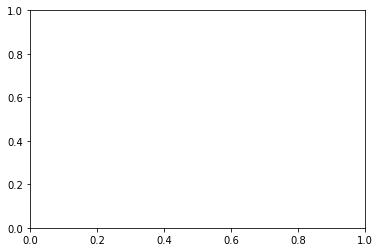

In [7]:
xn = range(len(df))
df.plot.scatter(x=xn,
                      y='freq',
                      c='DarkBlue')

In [8]:

hatebase = pd.read_csv('slavic_review_data/hatebase.csv')

In [9]:

common = pd.Series(list(set(df['word']) & set(hatebase['term'])))


In [10]:
common


0          puto
1          sole
2          magi
3          dego
4      rednecks
         ...   
649         pom
650       neres
651      snouts
652      fezzes
653       kokot
Length: 654, dtype: object

In [14]:
common.to_csv('omg.csv')

In [11]:
new_data = []
for term in common:
    row = {}
    row['term'] = term
    row['freq'] = main_dict[term]
    new_data.append(row)
df= pd.DataFrame(new_data, columns=['term', 'freq']).sort_values('freq', ascending=False)
df.to_csv('omg_freq1.csv')

In [12]:
df

,term,freq
582,nicht,26089
466,property,9379
186,avec,9319
442,ka,8139
548,muslim,5786
...,...,...
426,vacca,1
424,ikes,1
419,goober,1
555,lubras,1
